In [3]:
import pandas as pd
file_url = "D:\RnD\python-dev\Data_Science_Workshop\CH03_Binary_Classification\\bank-full.csv"

bankData = pd.read_csv(file_url, sep=";")

from pandas import set_option

bankNumeric = bankData[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']]

set_option('display.width', 150)
set_option('precision', 3)
bankCorr = bankNumeric.corr(method = 'pearson')
bankCorr

,age,balance,day,duration,campaign,pdays,previous
age,1.000,0.098,-0.009,-0.005,0.005,-0.024,0.001
balance,0.098,1.000,0.005,0.022,-0.015,0.003,0.017
day,-0.009,0.005,1.000,-0.030,0.162,-0.093,-0.052
duration,-0.005,0.022,-0.030,1.000,-0.085,-0.002,0.001
campaign,0.005,-0.015,0.162,-0.085,1.000,-0.089,-0.033
pdays,-0.024,0.003,-0.093,-0.002,-0.089,1.000,0.455
previous,0.001,0.017,-0.052,0.001,-0.033,0.455,1.000


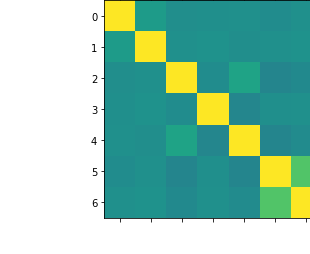

In [5]:
from matplotlib import pyplot
corFig = pyplot.figure()
figAxis = corFig.add_subplot(111)
corAx = figAxis.matshow(bankCorr, vmin=-1, vmax=1)
corFig.colorbar(corAx)
pyplot.show()

In [6]:
# Skewness of numeric attributes
bankNumeric.skew()

age          0.685
balance      8.360
day          0.093
duration     3.144
campaign     4.899
pdays        2.616
previous    41.846
dtype: float64

In [9]:
# Histograms
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2)

axs[0].hist(bankNumeric['age'])
axs[0].set_title('Distribution of age')

axs[1].hist(bankNumeric['assetIndex'])
axs[1].set_title('Distribution of Asset Index')

KeyError: 'assetIndex'

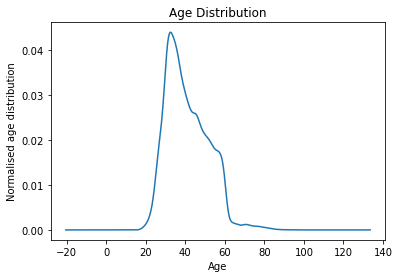

In [10]:
bankNumeric['age'].plot(kind = 'density', subplots = False, layout = (1, 1))
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Normalised age distribution')

pyplot.show()

In [11]:
# Standardize data (0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler
from numpy import set_printoptions
scaling = StandardScaler().fit(bankNumeric)
rescaledNum = scaling.transform(bankNumeric)

set_printoptions(precision = 3)
print(rescaledNum)

[[ 1.607  0.256 -1.298 ... -0.569 -0.411 -0.252]
 [ 0.289 -0.438 -1.298 ... -0.569 -0.411 -0.252]
 [-0.747 -0.447 -1.298 ... -0.569 -0.411 -0.252]
 ...
 [ 2.925  1.43   0.143 ...  0.722  1.436  1.05 ]
 [ 1.513 -0.228  0.143 ...  0.399 -0.411 -0.252]
 [-0.371  0.528  0.143 ... -0.247  1.476  4.524]]


In [14]:
# Normalizing Data (Length of 1)
from sklearn.preprocessing import Normalizer
normaliser = Normalizer().fit(bankNumeric)
normalisedNum = normaliser.transform(bankNumeric)

set_printoptions(precision = 3)
print(normalisedNum)

[[ 2.686e-02  9.923e-01  2.315e-03 ...  4.630e-04 -4.630e-04  0.000e+00]
 [ 2.750e-01  1.812e-01  3.125e-02 ...  6.249e-03 -6.249e-03  0.000e+00]
 [ 3.974e-01  2.408e-02  6.021e-02 ...  1.204e-02 -1.204e-02  0.000e+00]
 ...
 [ 1.235e-02  9.805e-01  2.917e-03 ...  8.579e-04  3.157e-02  5.147e-04]
 [ 6.775e-02  7.940e-01  2.021e-02 ...  4.754e-03 -1.189e-03  0.000e+00]
 [ 1.234e-02  9.906e-01  5.668e-03 ...  6.669e-04  6.269e-02  3.668e-03]]
